# Exercise 4: Time series

Aim: To work with mooring data and plot time series

- Author: XX YOUR NAME XX
- Purpose: Plot velocity data
- Date: YYYY-MM-DD

Four figures should be generated:

<hr>

In [1]:
# Importing required packages here
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import os
import netCDF4
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter
from modules.bathymetry import *
from scipy import io
import gsw



In [2]:
# Set some paths
# Root directory - change this to the directory where you are working.
rootdir = '/Users/eddifying/Cloudfree/gitlab-cloudfree/messfern-plot-timeseries/'
#rootdir = 'C:\\Users\\Edward\\Documents\\GitHub\\messfern-plot-velo\\'
os.chdir(rootdir)
datadir = rootdir + 'data/'

# Output file paths for figures
figdir = '../figures/'
if not os.path.exists(figdir):
    os.makedirs(figdir)

# Load the CTD data

<xarray.Dataset> Size: 4MB
Dimensions:       (time: 13110, Mooring: 3)
Coordinates:
  * time          (time) datetime64[ns] 105kB 2024-05-21T08:30:01 ... 2024-05...
  * Mooring       (Mooring) int64 24B 1 2 3
    lat           (Mooring) float64 24B ...
    lon           (Mooring) float64 24B ...
Data variables:
    timeJ         (Mooring, time) float64 315kB ...
    prdM          (Mooring, time) float64 315kB ...
    tv290C        (Mooring, time) float64 315kB ...
    cond0mSPercm  (Mooring, time) float64 315kB ...
    PSAL          (Mooring, time) float64 315kB ...
    DEPTH         (Mooring, time) float64 315kB ...
    oxsatMmPerKg  (Mooring, time) float64 315kB ...
    oxsolMmPerKg  (Mooring, time) float64 315kB ...
    flag          (Mooring, time) float64 315kB ...
    timeS         (Mooring, time) float64 315kB ...
    CT            (Mooring, time) float64 315kB ...
    SA            (Mooring, time) float64 315kB ...
Attributes: (12/13)
    history:       Created by cnv2nc (PyCNV

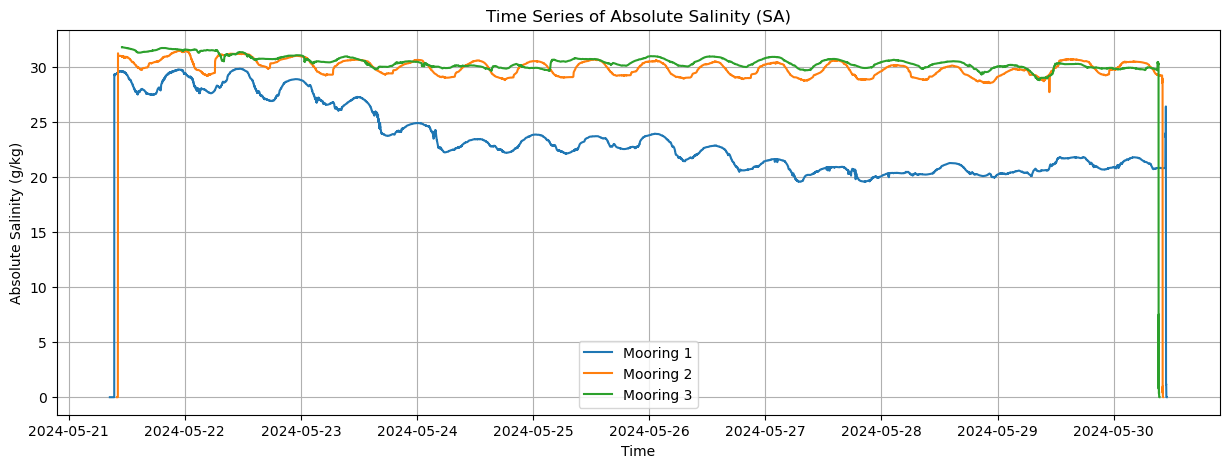

Modified dataset saved to /Users/eddifying/Cloudfree/gitlab-cloudfree/messfern-plot-timeseries/data/mooredCTD1_raw.nc


In [7]:
inputfile = os.path.join(datadir, 'mooredCTD.nc')

ctd_data = xr.open_dataset(inputfile)
print(ctd_data)

# Plot the time series of Absolute Salinity (SA)
plt.figure(figsize=(15, 5))
for mooring in ctd_data.Mooring:
    plt.plot(ctd_data.time, ctd_data.SA.sel(Mooring=mooring), label=f'Mooring {mooring.item()}')

plt.xlabel('Time')
plt.ylabel('Absolute Salinity (g/kg)')
plt.title('Time Series of Absolute Salinity (SA)')
plt.legend()
plt.grid(True)
plt.show()

# Remove the fields CT and SA from the dataset
ctd_data = ctd_data.drop_vars(['CT', 'SA'])
# Replace the fill value attribute for timeJ with NaN
ctd_data['timeJ'] = ctd_data['timeJ'].where(ctd_data['timeJ'] != ctd_data['timeJ'].attrs.get('_FillValue', np.nan), np.nan)
# Replace the fill value attribute for prdM with NaN
ctd_data['prdM'] = ctd_data['prdM'].where(ctd_data['prdM'] != ctd_data['prdM'].attrs.get('_FillValue', np.nan), np.nan)
# Replace the fill value attribute for tv290C with NaN
ctd_data['tv290C'] = ctd_data['tv290C'].where(ctd_data['tv290C'] != ctd_data['tv290C'].attrs.get('_FillValue', np.nan), np.nan)
# Replace the fill value attribute for cond0mSPercm with NaN
ctd_data['cond0mSPercm'] = ctd_data['cond0mSPercm'].where(ctd_data['cond0mSPercm'] != ctd_data['cond0mSPercm'].attrs.get('_FillValue', np.nan), np.nan)
# Replace the fill value attribute for PSAL with NaN
ctd_data['PSAL'] = ctd_data['PSAL'].where(ctd_data['PSAL'] != ctd_data['PSAL'].attrs.get('_FillValue', np.nan), np.nan)
# Replace the fill value attribute for DEPTH with NaN
ctd_data['DEPTH'] = ctd_data['DEPTH'].where(ctd_data['DEPTH'] != ctd_data['DEPTH'].attrs.get('_FillValue', np.nan), np.nan)
# Replace the fill value attribute for oxsatMmPerKg with NaN
ctd_data['oxsatMmPerKg'] = ctd_data['oxsatMmPerKg'].where(ctd_data['oxsatMmPerKg'] != ctd_data['oxsatMmPerKg'].attrs.get('_FillValue', np.nan), np.nan)
# Replace the fill value attribute for oxsolMmPerKg with NaN
ctd_data['oxsolMmPerKg'] = ctd_data['oxsolMmPerKg'].where(ctd_data['oxsolMmPerKg'] != ctd_data['oxsolMmPerKg'].attrs.get('_FillValue', np.nan), np.nan)
# Replace the fill value attribute for flag with NaN
ctd_data['flag'] = ctd_data['flag'].where(ctd_data['flag'] != ctd_data['flag'].attrs.get('_FillValue', np.nan), np.nan)
# Replace the fill value attribute for timeS with NaN
ctd_data['timeS'] = ctd_data['timeS'].where(ctd_data['timeS'] != ctd_data['timeS'].attrs.get('_FillValue', np.nan), np.nan)

rename_dict = {'prdM': 'PRES', 'tv290C': 'TEMP', 'lon': 'LON', 'lat': 'LAT'}
ctd_data = ctd_data.rename(rename_dict)

# Extract data for Mooring=1 only
ctd_data1 = ctd_data.sel(Mooring=1)
# Save the modified dataset back to a NetCDF file
outputfile = os.path.join(datadir, 'mooredCTD1_raw.nc')

# Check if the file already exists and delete it if it does
if os.path.exists(outputfile):
    os.remove(outputfile)
ctd_data1.to_netcdf(outputfile)

# Rename variables
print(f"Modified dataset saved to {outputfile}")

In [4]:
# Define the path to the file
velo_file = os.path.join(datadir, 'mooring1velo.nc')

# Open the dataset
velo_data = xr.open_dataset(velo_file)

print(list(velo_data.data_vars))

# Rename the velocity variables
velo_data = velo_data.rename({
    'Velocity (Beam1|X|East)': 'UVEL',
    'Velocity (Beam2|Y|North)': 'VVEL',
    'Velocity (Beam3|Z|Up)': 'WVEL',
    'DateTime': 'time'
})

# Extract data for Mooring=1 and use only the Coordinate and Dimension of DateTime
velo_data_mooring1 = velo_data.sel(Mooring=1).drop_vars(['Mooring','tidal_phase'])
print(velo_data_mooring1)



# Define the output path for the new NetCDF file
output_path_velo = os.path.join(datadir, 'mooring1velocity.nc')

# Check if the file already exists and delete it if it does
if os.path.exists(output_path_velo):
    os.remove(output_path_velo)
# Write the dataset to a NetCDF file
velo_data_mooring1.to_netcdf(output_path_velo)

print(f"Velocity data for Mooring 1 written to {output_path_velo}")

['Error code', 'Status code', 'Velocity (Beam1|X|East)', 'Velocity (Beam2|Y|North)', 'Velocity (Beam3|Z|Up)', 'Amplitude (Beam1)', 'Amplitude (Beam2)', 'Amplitude (Beam3)', 'Battery voltage', 'Soundspeed', 'Soundspeed used', 'Heading', 'Pitch', 'Roll', 'Pressure (dbar)', 'Pressure (m)', 'Temperature', 'Analog input 1', 'Analog input 2', 'Speed', 'Direction', 'tidal_phase']
<xarray.Dataset> Size: 767kB
Dimensions:            (time: 4358)
Coordinates:
  * time               (time) datetime64[ns] 35kB 2024-05-21T09:05:00 ... 202...
Data variables: (12/21)
    Error code         (time) int64 35kB ...
    Status code        (time) int64 35kB ...
    UVEL               (time) float64 35kB ...
    VVEL               (time) float64 35kB ...
    WVEL               (time) float64 35kB ...
    Amplitude (Beam1)  (time) int64 35kB ...
    ...                 ...
    Pressure (m)       (time) float64 35kB ...
    Temperature        (time) float64 35kB ...
    Analog input 1     (time) int64 35kB ..

In [5]:
from scipy.optimize import curve_fit

# Define the cosine function with a variable period
def semi_diurnal_cosine_variable_period(t, amplitude, phase, offset, period):
    return amplitude * np.cos(2 * np.pi * t / period + phase) + offset

# Range of periods to test (in days)
periods = np.arange(12.0, 12.6 + 0.01, 0.01) / 24  # Convert hours to days

# Extract velocity data
uvel_data = velo_data.UVEL.values

# Use the same time_in_days as before
time_in_days = (velo_data.time - velo_data.time[0]).astype('timedelta64[s]') / np.timedelta64(1, 's') / 86400

# Remove points which are not finite from the time_in_days and salinity_data vectors
finite_indices = np.isfinite(time_in_days) & np.isfinite(uvel_data)
time_in_days = time_in_days[finite_indices]
uvel_data = uvel_data[finite_indices]

best_period = None
best_popt = None
best_rss = np.inf

# Iterate over the range of periods
for period in periods:
    try:
        # Fit the semi-diurnal cosine function to the salinity data
        popt, _ = curve_fit(lambda t, amplitude, phase, offset: semi_diurnal_cosine_variable_period(t, amplitude, phase, offset, period),
                            time_in_days, uvel_data, p0=[1, 0, np.mean(uvel_data)])
        
        # Calculate the residual sum of squares (RSS)
        fitted_salinity = semi_diurnal_cosine_variable_period(time_in_days, *popt, period)
        rss = np.sum((uvel_data - fitted_salinity) ** 2)
        
        # Update the best fit if the current RSS is lower
        if rss < best_rss:
            best_rss = rss
            best_period = period
            best_popt = popt
    except RuntimeError:
        # Skip periods where the fit did not converge
        continue

# Extract the best fitted parameters
amplitude, phase, offset = best_popt

# Generate the fitted salinity values for the best period
fitted_salinity = semi_diurnal_cosine_variable_period(time_in_days, amplitude, phase, offset, best_period)

# Print the best period in hours
print(f"Best fit period: {best_period * 24:.2f} hours")

# Plot the original and fitted salinity data
plt.figure(figsize=(15, 5))
plt.plot(time_in_days, uvel_data, label='Original Salinity Data')
plt.plot(time_in_days, fitted_salinity, label=f'Fitted Semi-Diurnal Cosine (Period: {best_period * 24:.2f} hours)', linestyle='--')
plt.xlabel('Time (days)')
plt.ylabel('Salinity (PSU)')
plt.title('Fitting Semi-Diurnal Cosine to Salinity Data')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/t1/z5bp59k95119nw35yqv699t40000gn/T/ipykernel_68701/1807724620.py:14: UserWarning: Converting non-nanosecond precision timedelta values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time_in_days = (velo_data.time - velo_data.time[0]).astype('timedelta64[s]') / np.timedelta64(1, 's') / 86400


ValueError: dimensions ('time',) must have the same length as the number of data dimensions, ndim=2